In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.14.0


## Load a dataset

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


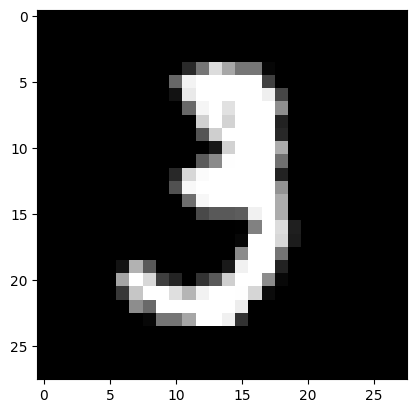

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10],cmap= 'gray')

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2972 - accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1429 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1072 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0892 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0741 - accuracy: 0.9767


In [7]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0734 - accuracy: 0.9775 - 688ms/epoch - 2ms/step


[0.07339583337306976, 0.9775000214576721]

In [17]:
y_test[10]

0

In [18]:
x_test[10].shape

(28, 28)

In [21]:
test_sample = x_test[10].reshape(1,28,28)

In [22]:
model.predict(test_sample)

1/1 [==============================] - 0s 16ms/step


array([[ 12.422095  ,  -7.5663385 ,   0.14032787,  -5.4324303 ,
        -16.712032  ,   0.7926112 ,  -4.028101  ,  -4.6609683 ,
        -10.852393  ,  -0.18612835]], dtype=float32)

In [23]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [24]:
probability_model.predict(test_sample)

1/1 [==============================] - 0s 44ms/step


array([[9.9998295e-01, 2.0850961e-09, 4.6354148e-06, 1.7614497e-08,
        2.2243408e-13, 8.8996267e-06, 7.1740359e-08, 3.8098911e-08,
        7.7984931e-11, 3.3443407e-06]], dtype=float32)